# Tarea 1 Cosmología
Antonia Cisternas <br>
Profesor: Doménico Sapone <br>
Auxiliares: Francisco Colipi & Vicente Pedreros

## P6 
Using CAMB, plot the evolution of the density parameters for matter, radiation, dark energy and curvature.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


### Definición del modelo cosmológico
En este caso, consideremos los parámetros de [Planck](https://arxiv.org/abs/1807.06209):

| | |
| - | - |
| $H_0 = (67.4 ± 0.5) km/s/Mpc $ | Hubble constant |
| $\Omega_m = 0.315 ± 0.0071$ | matter density parameter |
| $\Omega_c h^2: 0.120 ± 0.0011$ | dark matter density |
| $\Omega_b h^2 = 0.0224 ± 0.00011$ | baryon density |
| $n_s = 0.965 ± 0.0041$ | scalar spectral index | 
| $\tau = 0.054 ± 0.0071$ | optical depth | 


In [13]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

Se agregan los parámetros a camb y se obienen los resultados

In [14]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

results = camb.get_results(pars)

### Parámetros de densidad
Se obtienen los valores del parámetros de densidad de materia:
$\Omega_m = \Omega_c + \Omega_b + \Omega_{\nu}$

En el cual $\Omega_c$ es el parámetro de densidad de materia oscura fría, $\Omega_b$ es el parámetro de densidad de materia bariónica y $\Omega_{\nu}$ es el parámetro de densidad de neutrinos masivos.

Además, $\Omega_{DE}$ es el parámetro de densidad de energía oscura, $\Omega_{\gamma}$ es el parámetro de densidad de radiación y $\Omega_{k}$ es el parámetro de densidad de curvatura.

In [15]:
zs = np.linspace(0, 10, 1_000)
# redshift de 0 a 10

# Obtenemos los valores de Omega para cada componente
Omega_c = results.get_Omega('cdm', zs)
Omega_b = results.get_Omega('baryon', zs)
Omega_nu = results.get_Omega('nu', zs)
Omega_m = Omega_c + Omega_b + Omega_nu

Omega_gamma = results.get_Omega('photon', zs)
Omega_DE = results.get_Omega('de', zs)
Omega_k = results.get_Omega('K', zs)


### Gráficos

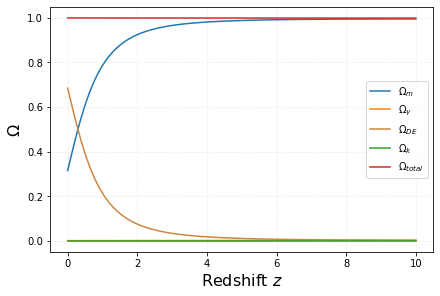

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout=True)

# Graficar en escala lineal
ax.plot(zs, Omega_m, label=r'$\Omega_{m}$')
ax.plot(zs, Omega_gamma, label=r'$\Omega_{\gamma}$')
ax.plot(zs, Omega_DE, label=r'$\Omega_{DE}$', color='peru')
ax.plot(zs, Omega_k, label=r'$\Omega_{k}$')
ax.plot(zs, Omega_k + Omega_m + Omega_gamma + Omega_DE, label=r'$\Omega_{total}$')

# Configurar la cuadrícula y las etiquetas
ax.grid(alpha=0.4, ls=':')
ax.legend()
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$\Omega$', fontsize=16)

# Mostrar la gráfica
plt.show()

Graficando en escala logarítmica

Text(0, 0.5, '$\\Omega$')

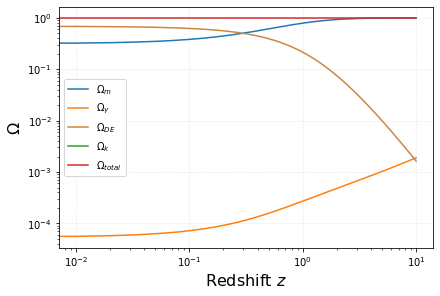

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, Omega_m, label=r'$\Omega_{m}$')
ax.loglog(zs, Omega_gamma, label=r'$\Omega_{\gamma}$')
ax.loglog(zs, Omega_DE, label=r'$\Omega_{DE}$', color='peru')
ax.loglog(zs, Omega_k, label=r'$\Omega_{k}$')

ax.loglog(zs, Omega_k + Omega_m + Omega_gamma + Omega_DE, label=r'$\Omega_{total}$')


ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$\Omega$', fontsize=16)

Text(0, 0.5, '$\\Omega$')

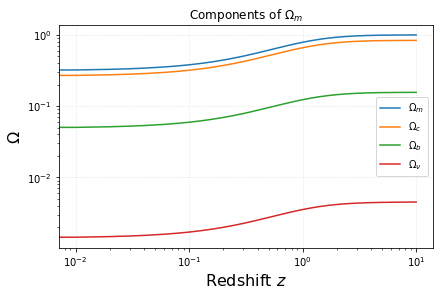

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, Omega_m, label=r'$\Omega_{m}$')
ax.loglog(zs, Omega_c, label=r'$\Omega_{c}$')
ax.loglog(zs, Omega_b, label=r'$\Omega_{b}$')
ax.loglog(zs, Omega_nu, label=r'$\Omega_{\nu}$')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_title(r'Components of $\Omega_{m}$')
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$\Omega$', fontsize=16)

## P7
The distance duality relation gives
$$ D_L(z) = (1+z)^2 D_A(z)$$ 

Plot the lines of constant $f_K(\chi)$ in the plane $\Omega_{m,0} - \Omega_{\Lambda,0}$, where

\begin{align}
    f_K(\chi) =
    \begin{dcases}
        \frac{c}{H_0\sqrt{\Omega_{K,0}}} \sinh{\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}>0 \\
        \frac{c}{H_0}\int_0^z \frac{dx}{E(x)} & \Omega_{k,0}=0\\
        \frac{c}{H_0\sqrt{-\Omega_{K,0}}} \sin{\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}<0\\
    \end{dcases}
\end{align}

Se definen los parámetros a utilizar.


In [19]:
w = -1
c = 3 * 10**5
z = 1

Omega_r = 10**(-4) # Como es cercano a 0, esta componente no afectará.
Omega_lambda = 0.75
Omega_c = 0.2
Omega_b = 0.05
Omega_m = Omega_b + Omega_c

Se definen las funciones a utilizar.


In [20]:
def D_A(z, H0, Omega_r ,Omega_m, Omega_lambda, Omega_k, w): 
    return f_k(z, H0, Omega_r ,Omega_m, Omega_lambda, Omega_k, w)/ (1+z)

def D_L(z, H0, Omega_r ,Omega_m, Omega_lambda, Omega_k, w):
    return (1+z) * f_k(z, H0, Omega_r ,Omega_m, Omega_lambda, Omega_k, w)

def Hubble2(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w):
    return H0**2 * (Omega_r*(1+z)**4 + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+w)) + Omega_k*(1+z)**2)

def E(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w):
    return np.sqrt(Hubble2(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w)) / H0

def func(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w):
    return 1 / E(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w)

def f_k(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w):
    z_vals = np.linspace(0, z, 1000)  # Discretize the redshift range
    integrand_vals = func(z_vals, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w)
    integral = np.trapz(integrand_vals, z_vals)  # Perform the integration using trapezoidal rule
    
    if Omega_k > 0:
        return (c / (H0 * np.sqrt(Omega_k))) * np.sinh(np.sqrt(Omega_k) * integral)
    elif Omega_k == 0:
        return (c / H0) * integral
    elif Omega_k < 0:
        return (c / (H0 * np.sqrt(-Omega_k))) * np.sin(np.sqrt(-Omega_k) * integral)

<ipython-input-20-feb540d9fcbb>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Hubble2(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w)) / H0


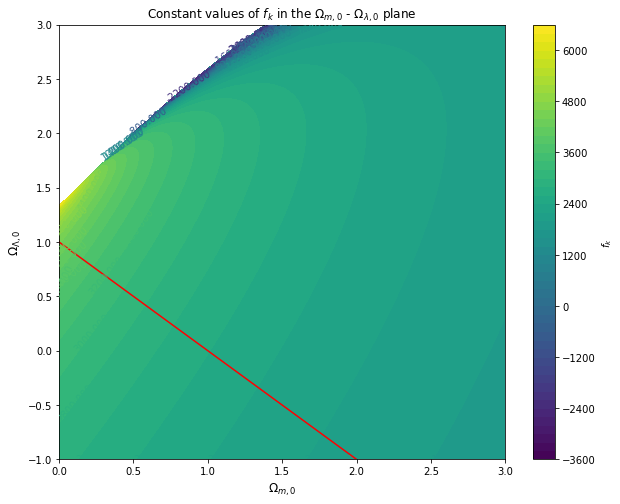

In [21]:
# Se define el rango en el que cambian los parámetros de densidad.
Omega_m_values = np.linspace(0, 3, 500)
Omega_lambda_values = np.linspace(-1, 3, 500)

Omega_m_grid, Omega_lambda_grid = np.meshgrid(Omega_m_values, Omega_lambda_values)

# Se calcula Omega_k con respecto a las variables anteriores.
Omega_k_grid = 1 - Omega_m_grid - Omega_lambda_grid

f_k_grid = np.zeros_like(Omega_m_grid)
for i in range(Omega_m_grid.shape[0]):
    for j in range(Omega_m_grid.shape[1]):
        Omega_m = Omega_m_grid[i, j]
        Omega_lambda = Omega_lambda_grid[i, j]
        Omega_k = Omega_k_grid[i, j]
        f_k_grid[i, j] = f_k(z, H0, Omega_r, Omega_m, Omega_lambda, Omega_k, w)


plt.figure(figsize=(10, 8))
contour = plt.contourf(Omega_m_grid, Omega_lambda_grid, f_k_grid, levels=50, cmap='viridis')
Omega_m_values = np.linspace(0, 2, 500)
plt.plot(Omega_m_values, 1- Omega_m_values, color='red')
plt.clabel(contour, inline=False)
plt.xlabel(r'$\Omega_{m,0}$', fontsize=12)
plt.ylabel(r'$\Omega_{\Lambda,0}$', fontsize=12)
plt.title(r'Constant values of $f_k$ in the $\Omega_{m,0}$ - $\Omega_{\lambda,0}$ plane')
#plt.grid(True)
plt.colorbar(contour, label=r'$f_k$')
plt.show()